In [12]:
import xtrack as xt
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [10]:
tw = line.twiss()
gamma0 = line.particle_ref.gamma0
beta0 = line.particle_ref.beta0
L = line.get_length()

def sweep(line, dR):
    gtr = 1/np.sqrt(tw.momentum_compaction_factor)
    res  = (1 - gamma0**2 / gtr**2) * dR
    res -= 2 * gamma0**2 * beta0**2 / L * dR**2
    cav, _ = line.get_elements_of_type(xt.Cavity)
    freq = cav[0].frequency
    return res * freq / L * 2 * np.pi 

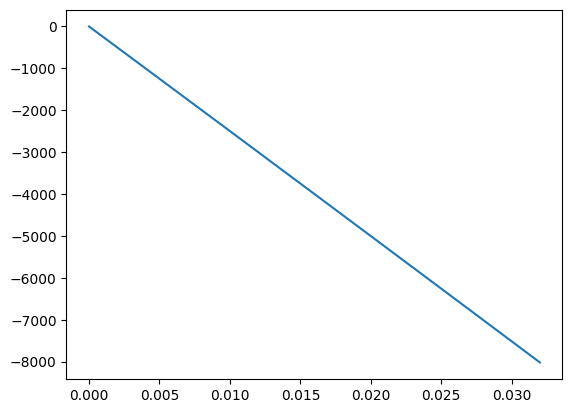

In [13]:
dR = np.linspace(0, 0.032, 100)
plt.plot(dR, sweep(line, dR))

In [15]:
1/tw.momentum_compaction_factor/line.get_length() * 2 * np.pi

0.29292688035838155